In [24]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


from sklearn.preprocessing import StandardScaler

import seaborn as sns



In [25]:
#df_All = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-20-23 No Fluff\df_All_Avg.csv")

df_All = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\df_CDCA.csv")
#df_All = pd.read_csv('/workspaces/codespaces-jupyter/ProjectrC4/df_AlConCD554.csv')

FScore = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\FScore_on_Butanol.csv")


In [ ]:
selected_columns = ['Butanol', 
                    'FC55569',
                    'DI55152',
                    '425 %Al',
                    'TC55552',
                    'FC55003',
                    'LC55555',
                    'FFC55553',
                    'FFC55555',
                    'TC55555',
                    'TI55021',
                    'PI55004',
                    'FC55552'
                    ]
existing_columns = [col for col in selected_columns if col in df_All.columns]
df_All = df_All[existing_columns]

In [26]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [27]:
# df_All = df_All[df_All['Date'] > '2020-06-15 00:00:00']

In [28]:
print(df_All.describe())

            Butanol       425 %Al       TC55552       DI55102       FC55569  \
count  12718.000000  12718.000000  12718.000000  12718.000000  12718.000000   
mean      10.682271      5.928132    164.486979      0.882777   6418.380490   
std       12.116228      0.374842     12.500750      0.085052    397.647827   
min        0.100000      4.573810    120.114000      0.794808   5142.080000   
25%        3.123935      5.784038    158.524000      0.794863   6135.472500   
50%        5.451665      6.008620    165.515000      0.881021   6420.345000   
75%       12.800850      6.178960    173.455000      0.968991   6709.925000   
max       60.346700      7.096060    207.426000      1.032950   7806.490000   

            DI55152       FC55576       TI55017       FC42428      AYC55580  \
count  12718.000000  12718.000000  12718.000000  12718.000000  12718.000000   
mean       1.001901    527.911065    188.358947  29476.385886      8.322303   
std        0.037287    262.282229      9.138614   5

In [29]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = ['Date', 'Decanol']

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

     Feature  Importance
19   TC55555       126.0
18  FFC55555       157.0
17   TI55021       166.0
16   FC55003       179.0
15   LC55553       189.0
14   FC55009       194.0
13   LC55555       203.0
12   LC55557       208.0
11   TI55023       216.0
10   FC42428       226.0
9   FFC55553       229.0
8    FC55555       275.0
7    TI55017       288.0
6    FC55576       293.0
5   AYC55580       307.0
4    FC55569       324.0
3    DI55152       331.0
2    DI55102       372.0
1    TC55552       470.0
0    425 %Al       605.0
Training features: 20, Testing features: 20
Iteration for dropping feature 'None' is complete.


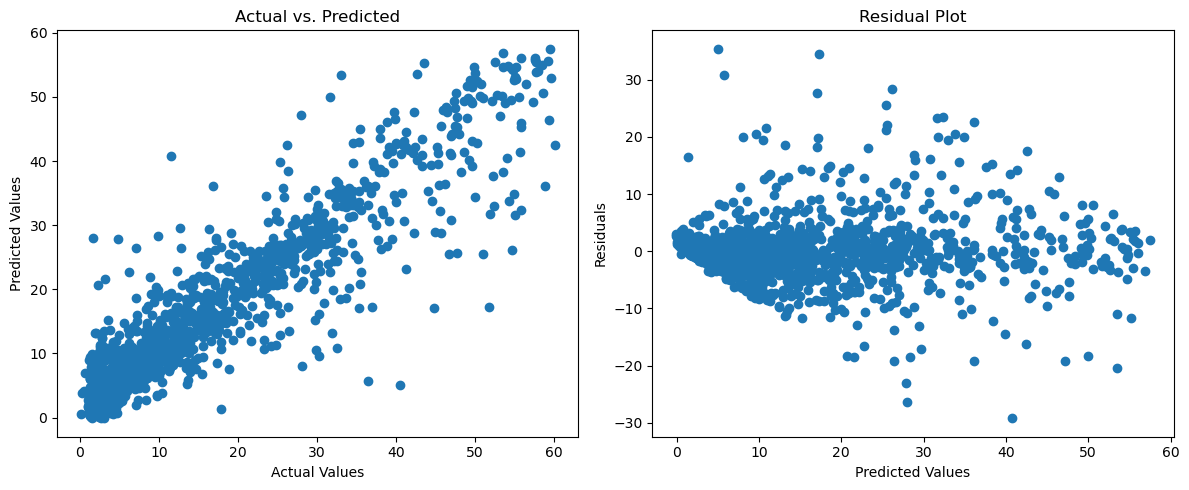

Training features: 19, Testing features: 19
Iteration for dropping feature 'TC55555' is complete.


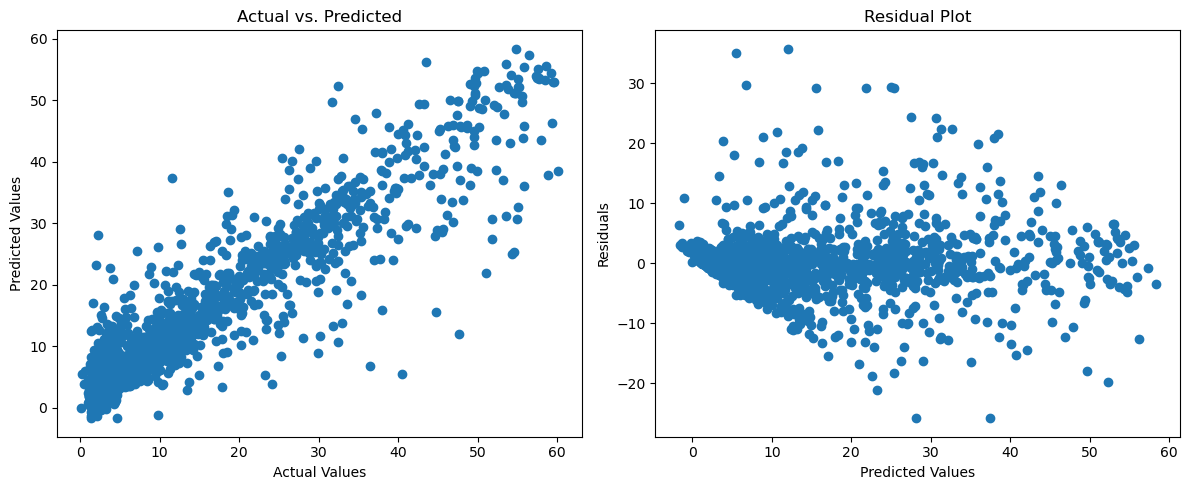

Training features: 18, Testing features: 18
Iteration for dropping feature 'TI55021' is complete.


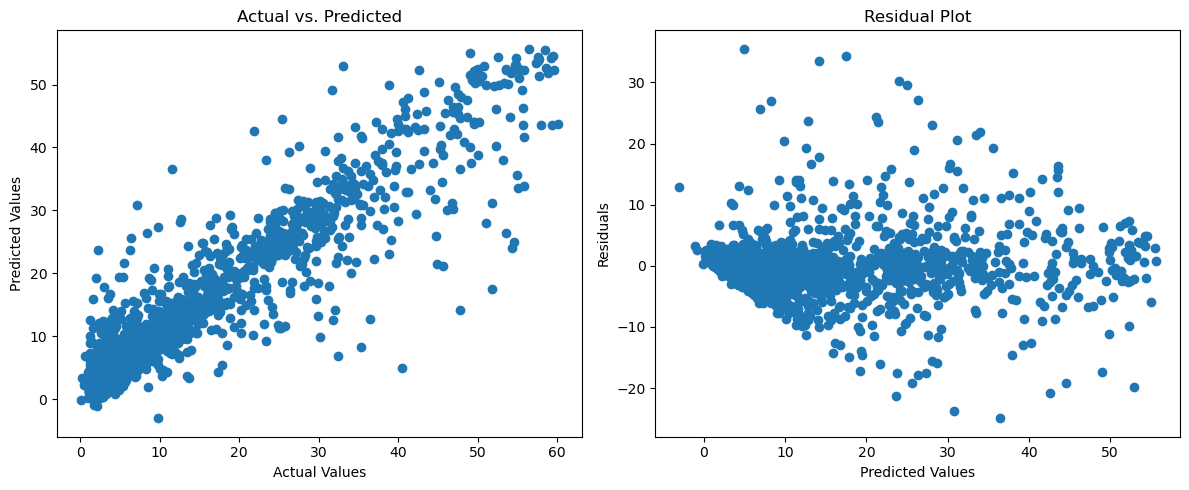

Training features: 17, Testing features: 17
Iteration for dropping feature 'FC55003' is complete.


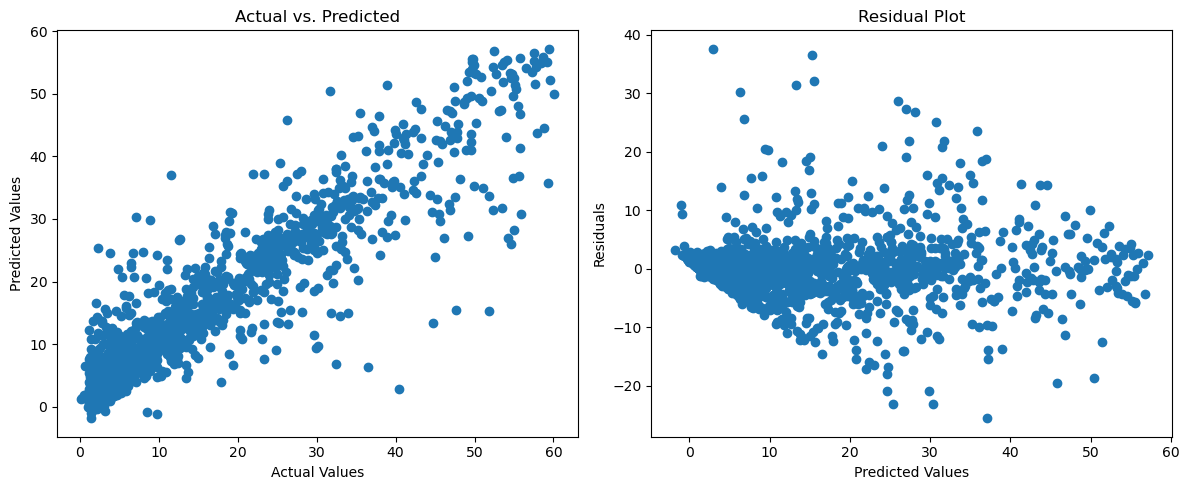

Training features: 16, Testing features: 16
Iteration for dropping feature 'LC55553' is complete.


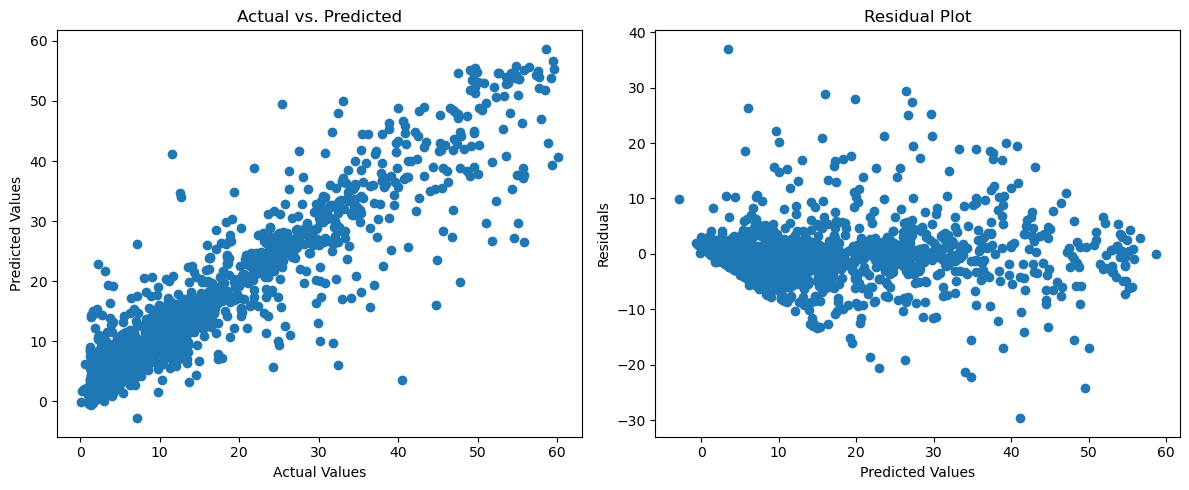

Training features: 15, Testing features: 15
Iteration for dropping feature 'FC55009' is complete.


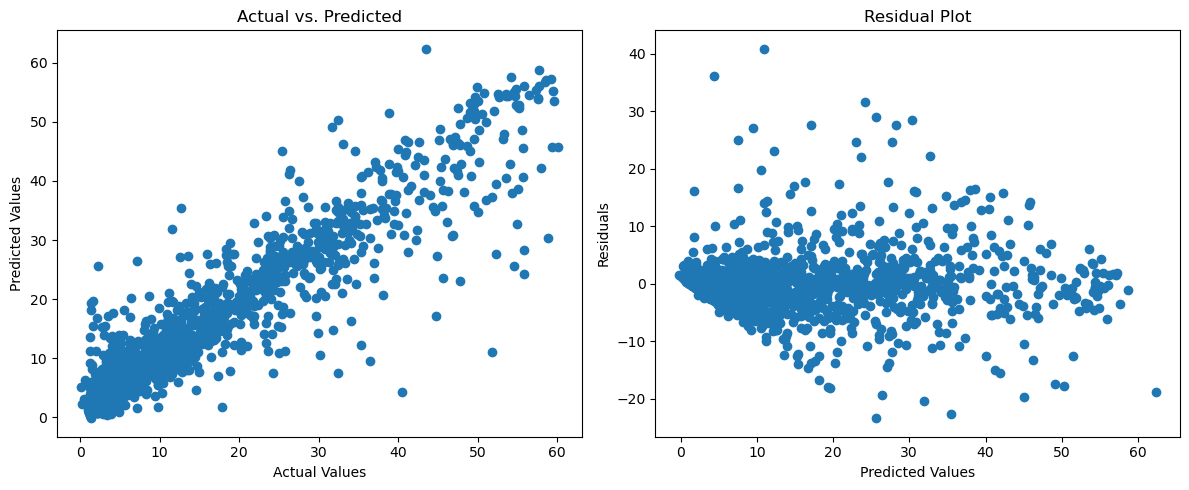

Training features: 14, Testing features: 14
Iteration for dropping feature 'LC55555' is complete.


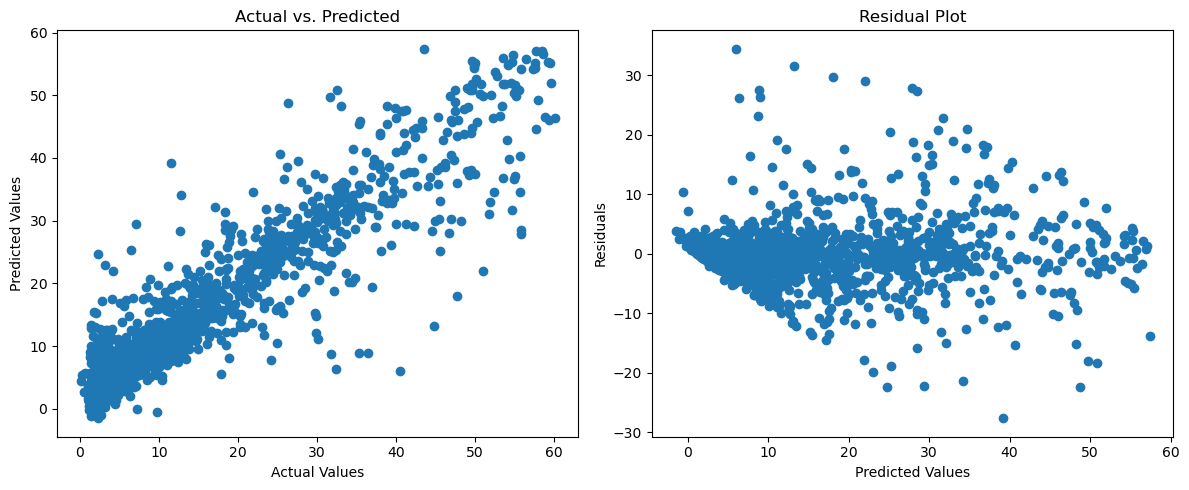

Training features: 13, Testing features: 13
Iteration for dropping feature 'LC55557' is complete.


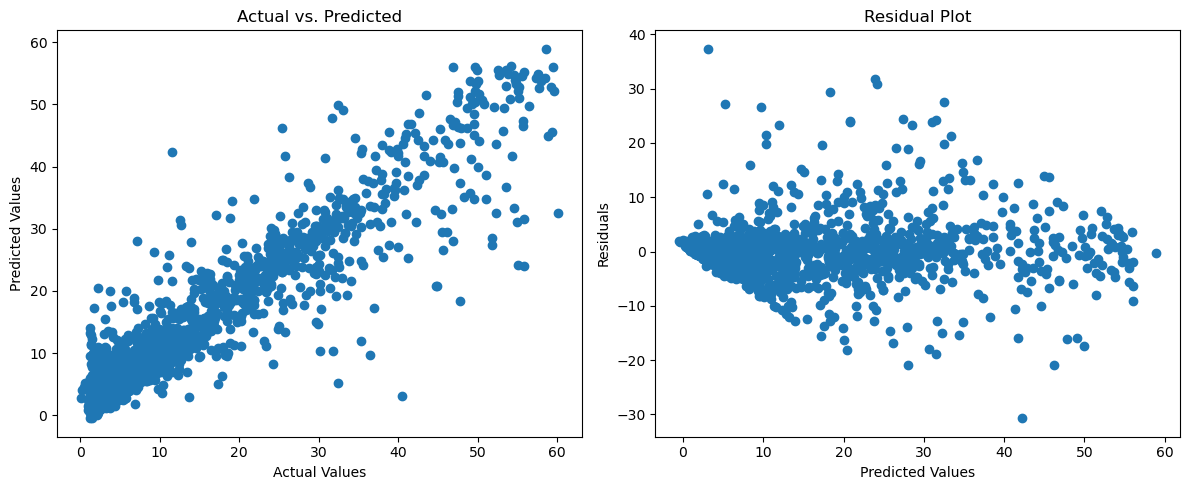

Training features: 12, Testing features: 12
Iteration for dropping feature 'TI55023' is complete.


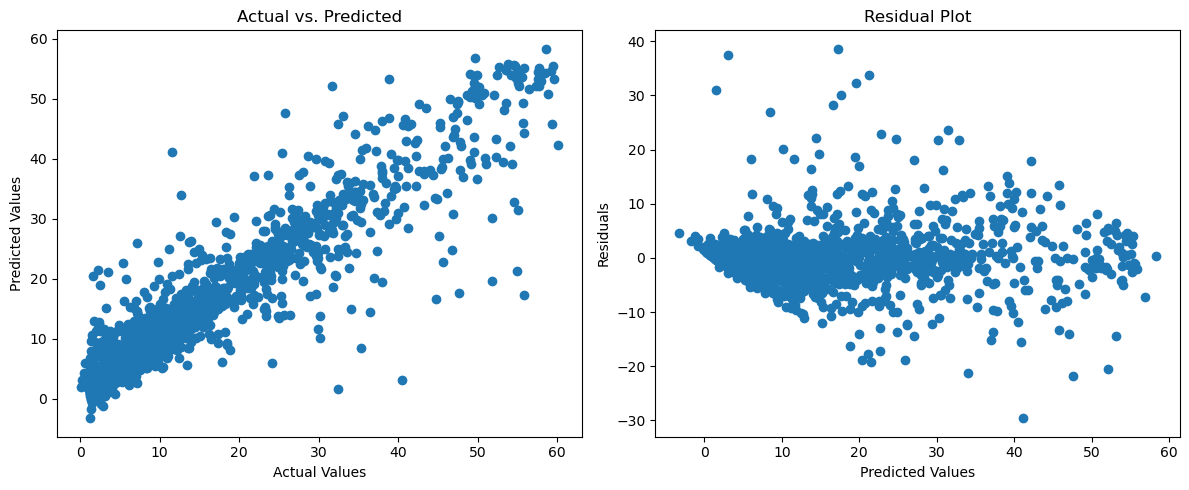

Training features: 11, Testing features: 11
Iteration for dropping feature 'FC42428' is complete.


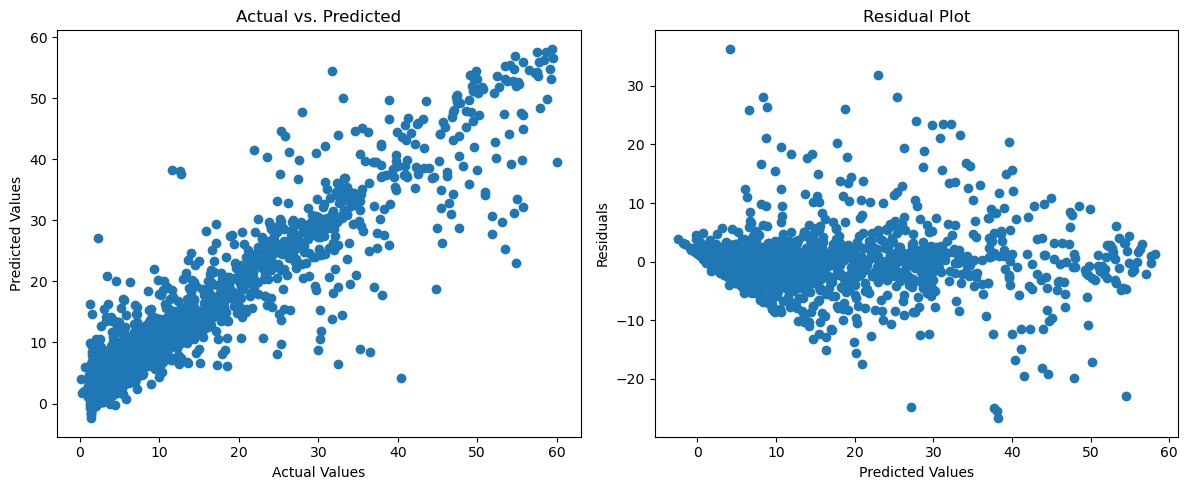

Training features: 10, Testing features: 10
Iteration for dropping feature 'FFC55553' is complete.


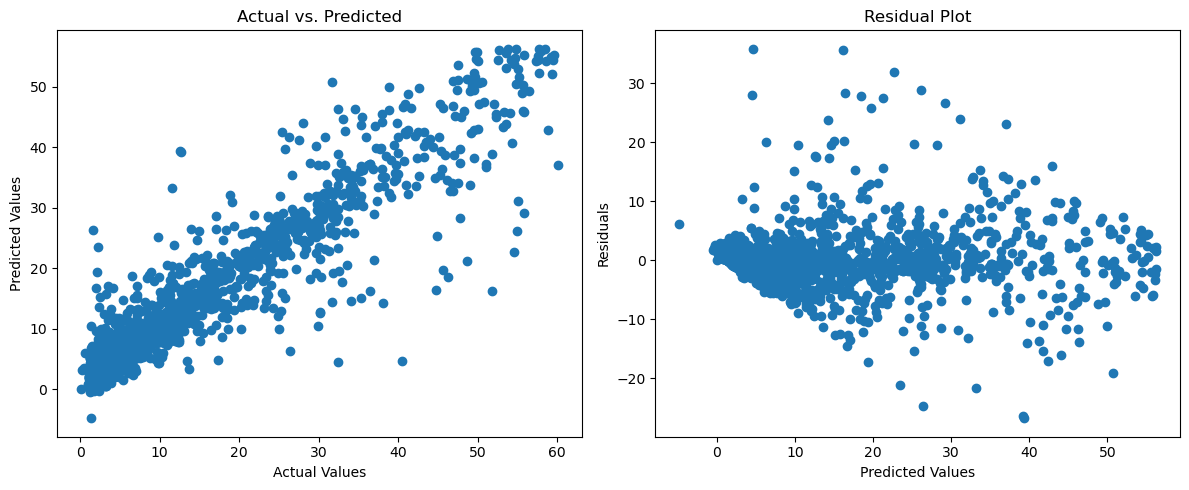

Training features: 9, Testing features: 9
Iteration for dropping feature 'FC55555' is complete.


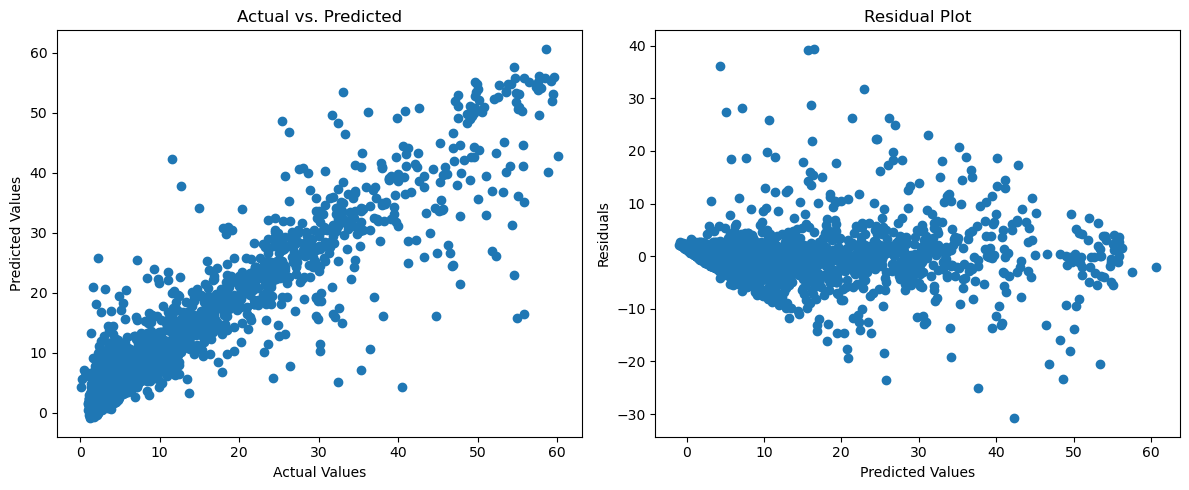

Training features: 8, Testing features: 8
Iteration for dropping feature 'TI55017' is complete.


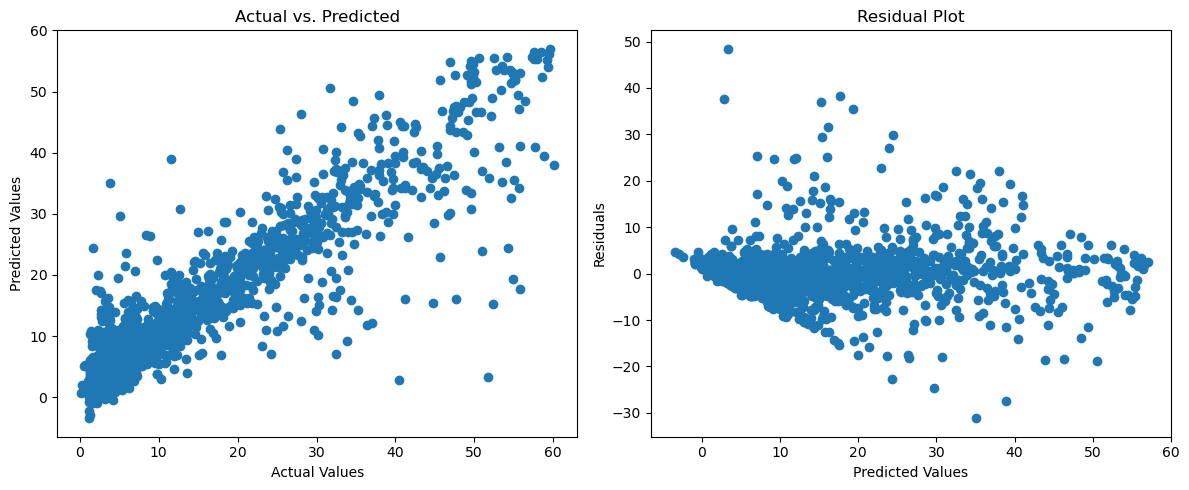

Training features: 7, Testing features: 7
Iteration for dropping feature 'FC55576' is complete.


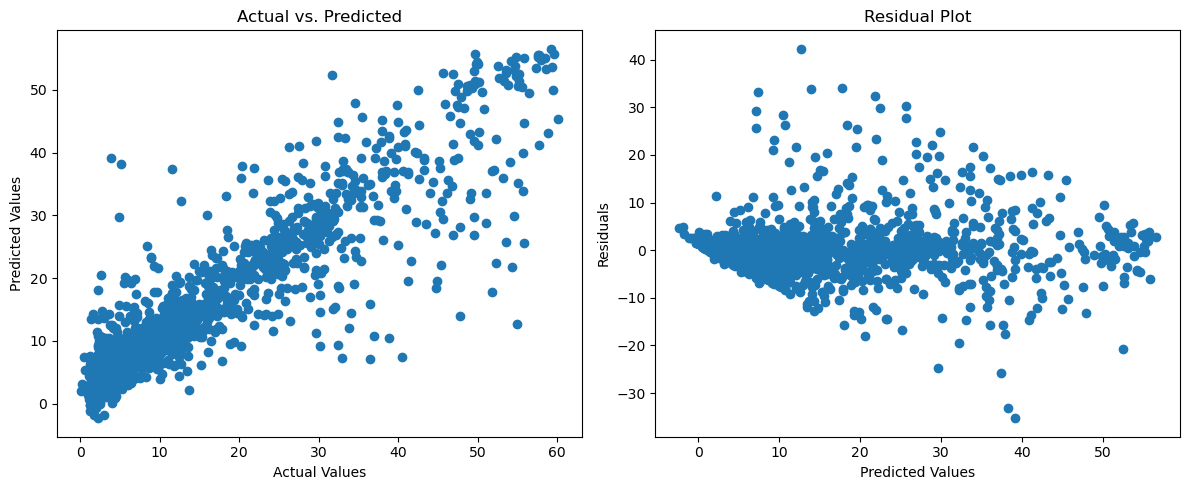

Training features: 6, Testing features: 6
Iteration for dropping feature 'AYC55580' is complete.


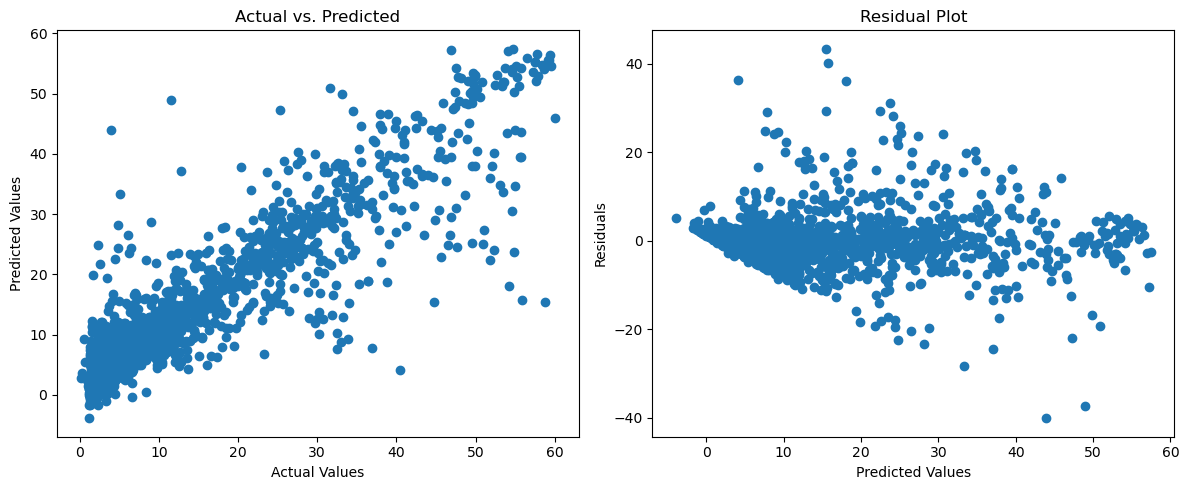

Training features: 5, Testing features: 5
Iteration for dropping feature 'FC55569' is complete.


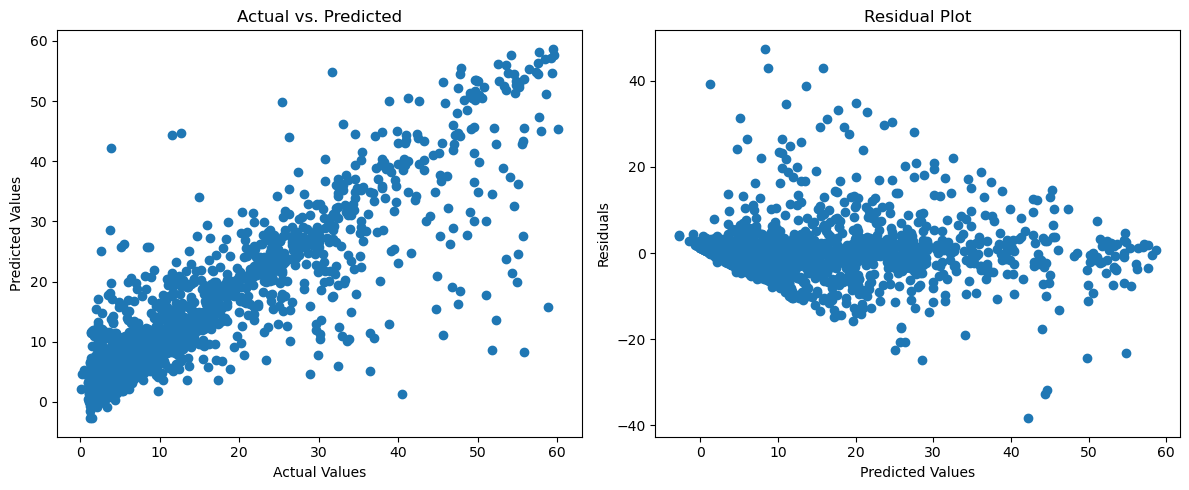

Training features: 4, Testing features: 4
Iteration for dropping feature 'DI55152' is complete.


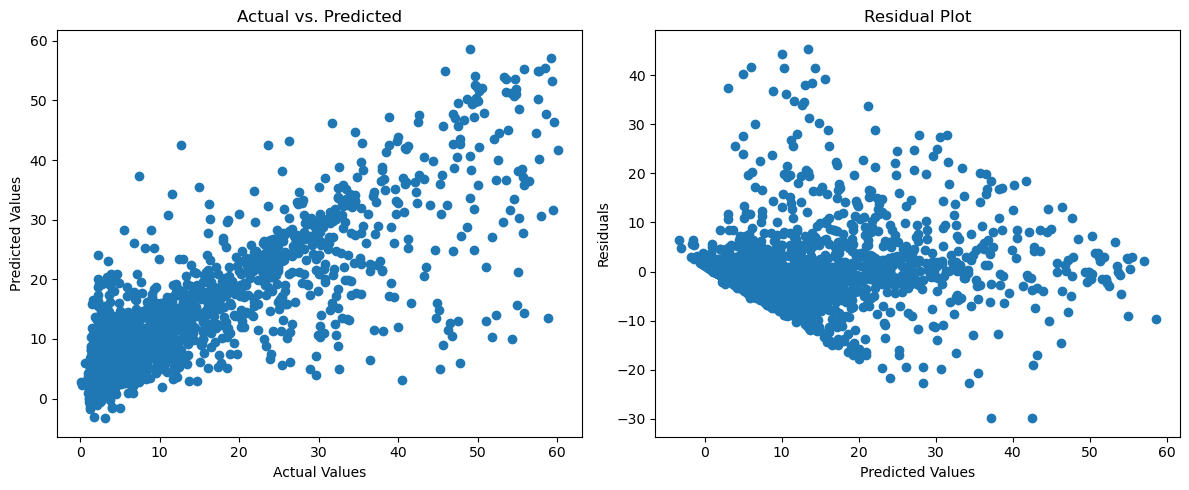

Training features: 3, Testing features: 3
Iteration for dropping feature 'DI55102' is complete.


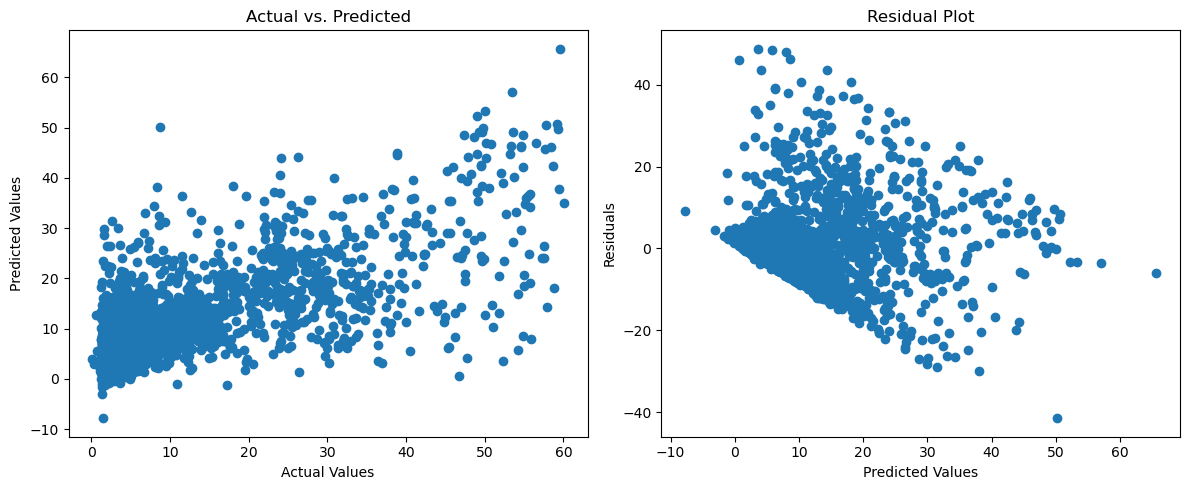

Training features: 2, Testing features: 2
Iteration for dropping feature 'TC55552' is complete.


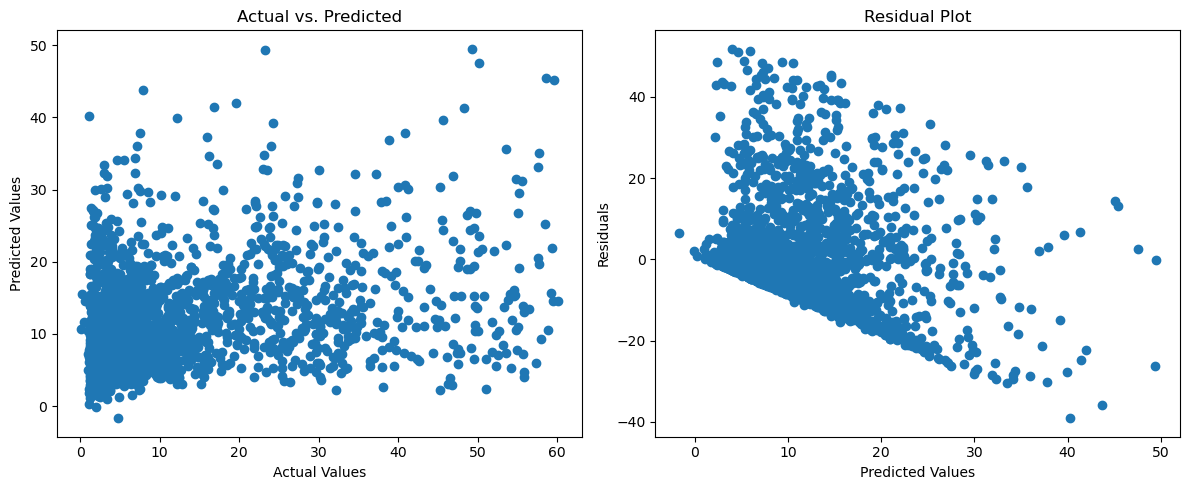

Training features: 1, Testing features: 1
Iteration for dropping feature '425 %Al' is complete.


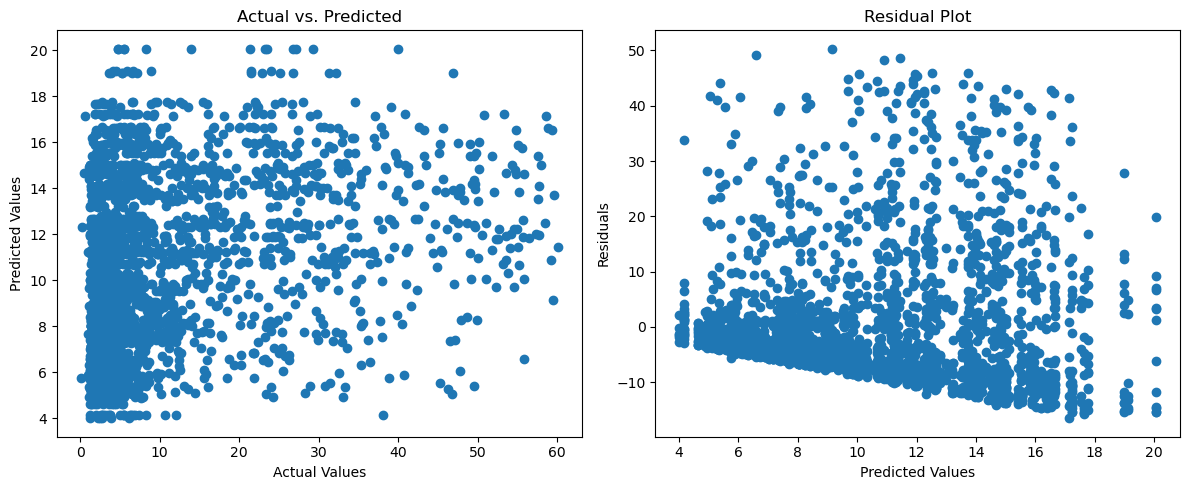

   Dropped_Feature         MSE        R2       RMSE
0             None   17.420419  0.887089   4.173778
1          TC55555   18.576682  0.879595   4.310067
2          TI55021   17.581128  0.886048   4.192986
3          FC55003   18.630213  0.879248   4.316273
4          LC55553   16.435926  0.893470   4.054125
5          FC55009   16.949272  0.890143   4.116949
6          LC55555   17.362932  0.887462   4.166885
7          LC55557   17.200536  0.888515   4.147353
8          TI55023   16.936840  0.890224   4.115439
9          FC42428   17.070973  0.889354   4.131703
10        FFC55553   16.850748  0.890782   4.104966
11         FC55555   19.263139  0.875146   4.388979
12         TI55017   21.217588  0.862478   4.606255
13         FC55576   22.307711  0.855412   4.723104
14        AYC55580   24.243677  0.842864   4.923787
15         FC55569   28.949339  0.812365   5.380459
16         DI55152   40.573180  0.737025   6.369708
17         DI55102   74.495471  0.517157   8.631076
18         T

In [30]:
# Assuming df_All is your data
X = df_All.drop(columns='Butanol')  # Assuming 'Butanol' is the name of your Butanol variable
y = df_All['Butanol']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Sort the FScore dataframe
FScore = FScore.sort_values(by='Importance')
print(FScore)

# Exclude 'FFC55555' from the list of features to drop
features_to_drop = ['None'] + FScore[FScore['Feature'] != 'FFC55555']['Feature'].tolist()



results = []

current_features = X.columns.tolist()

for feature in features_to_drop:
    
    if feature != 'None' and feature in current_features:
        current_features.remove(feature)

    # Get the indices of the current features
    feature_indices = [X.columns.get_loc(f) for f in current_features]

    # Subset the scaled datasets
    X_train_iteration = X_train_scaled[:, feature_indices]
    X_test_iteration = X_test_scaled[:, feature_indices]

    # Check shapes
    print(f"Training features: {X_train_iteration.shape[1]}, Testing features: {X_test_iteration.shape[1]}")
    assert X_train_iteration.shape[1] == X_test_iteration.shape[1], "Feature mismatch between training and testing sets"

    # Initialize and train the XGBoost Regressor on the scaled data
    xgb_model = xgb.XGBRegressor(
                                objective ='reg:squarederror',
                                n_estimators=500,

)

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    xgb_model.fit(X_train_iteration, y_train)
    
    
    y_pred = xgb_model.predict(X_test_iteration)
    
    # Record performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append([feature, mse, r2, rmse])
    print(f"Iteration for dropping feature '{feature}' is complete.")
    
    
    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Actual vs. Predicted
    ax[0].scatter(y_test, y_pred)
    ax[0].set_xlabel('Actual Values')
    ax[0].set_ylabel('Predicted Values')
    ax[0].set_title('Actual vs. Predicted')

    # Residual Plot
    residuals = y_test - y_pred
    ax[1].scatter(y_pred, residuals)
    ax[1].set_xlabel('Predicted Values')
    ax[1].set_ylabel('Residuals')
    ax[1].set_title('Residual Plot')
    
    plt.tight_layout()
    plt.show()

# Convert results into a dataframe
results_df = pd.DataFrame(results, columns=['Dropped_Feature', 'MSE', 'R2', 'RMSE'])
print(results_df)